# Lecture

A data set that contains input and output so that the machine can learn from those then predict later result.
- Location, attribute of a house to define how much it would cost
- The number of kilometers travelled to know how much customers may tip
- One of the ways to do is Linear Regression: **y = ax + b**

In [9]:
import pandas as pd
import matplotlib.pyplot as plt

In [26]:
#### Taxi price - Standard and Real paid with tip
# Amount_paid = b + a * Distance
# Answer: a = 4.7, b = 2.9
df_sim = pd.DataFrame(
    {
        'Kilometres': [1, 2, 3, 4, 5],
        'Meter': [7.5, 10, 12.5, 15, 17.5],
        'Paid (incl. tips)': [8, 10, 14, 15, 20],
    }
)
df_sim

,Kilometres,Meter,Paid (incl. tips)
0,1,7.5,8
1,2,10.0,10
2,3,12.5,14
3,4,15.0,15
4,5,17.5,20


But we need to define the model (a,b) but we need to know how each pair is
- Utility function: measures how good the model is
- Cost function: measure how bad the model is --> We want this one to be as small as possible

Linear Regression mainly uses the cost function. It would find a line:
- where the Mean of Square Errors (MSE) between the predicted point and the actual point is minimal 
- MSE = Average of $(y_{predict} - y_{actual})^2$

In [30]:
from sklearn.linear_model import LinearRegression

lin_reg = LinearRegression() #Rename, the initial name is too long

# Give examples with output for the machine to learn
lin_reg.fit(df_sim[['Kilometres']], df_sim[['Paid (incl. tips)']])

# Make predictions (based on the new parameter created previously in the fit function.
df_sim['Prediction'] = lin_reg.predict(df_sim[['Kilometres']])

In [76]:
# LR.fit() function accept the input and output to learn
# LR.predict() function use LinearRegression from fit() and 
## accepts new input (list format) to calculate
df_sim

,Kilometres,Meter,Paid (incl. tips),Prediction
0,1,7.5,8,7.6
1,2,10.0,10,10.5
2,3,12.5,14,13.4
3,4,15.0,15,16.3
4,5,17.5,20,19.2


In [68]:
lin_reg.intercept_, lin_reg.coef_
# These functions already got the input in the fit() function above
# So it only gives the result without getting any more input

(array([4.7]), array([[2.9]]))

### General form
$y_{predict} = b*1 + a_1*x_1 + a_2*x_2 + ... + a_n*x_n$
- In reality, there are more than 1 feature
- b is intercept
- $a_1, a_2, ..., a_n$ is feature weight (parameters or slope)

### Vector form
$y_{predict} = h_{\theta}(x) = 	\theta . x = \theta^T . x$. (Last part is more detail)
- $\theta$ is the parameter vector (vector contains intercepts and all other slopes for each feature)
- x is a vector containing all features, and $x_1 = 1$
- $\theta . x$ is a dot product
- $h_{\theta}$ is the hypothesis function containing hypothesis parameter for estimation

### Find $\theta$
- $\theta = (X^T . X)^{-1} . X^T . y$
- $\theta$ is the value that minimises the cost function MSE
- y is the vector of the target (actual) value, starting with $1, y_1, ..., y_n$

In [385]:
import numpy as np

In [127]:
X = 2 * np.random.rand(100,1) # 100 row, 1 column, value from 0 to 1
y = 4 + 3*X + np.random.randn(100,1) # 100 row, 1 column, value from 0 to 1
# Intercept 4, Slope 3, Noise random.randn 

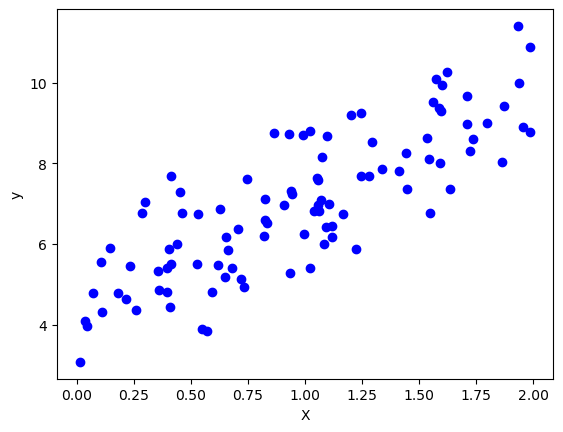

In [129]:
plt.ylabel('y')
plt.xlabel('X')
plt.plot(X, y, 'bo')

In [139]:
# Compute theta
X_b = np.c_[np.ones((100,1)), X] 
theta_best = np.linalg.inv(X_b.T.dot(X_b)).dot(X_b.T).dot(y)

In [144]:
theta_best

array([[4.39481512],
       [2.68551883]])

Intercept = 4.39481512, Slope = 2.65551883
- It close to 4 (intercept) and 3 (slope)
- It's different with the original form because of the noise

In [199]:
## Predict with the parameters calculated above
X_new = np.array([[0], [2], [1.2]])  # Value must be store in numpy array
X_new_b = np.c_[np.ones((3,1)), X_new] # Add column of 1 for the intercept
y_predict = X_new_b.dot(theta_best) # Predict using dot() function

In [182]:
X_new_b

array([[1. , 0. ],
       [1. , 2. ],
       [1. , 1.2]])

In [184]:
theta_best

array([[4.39481512],
       [2.68551883]])

In [195]:
y_predict

array([[4.39481512],
       [9.76585278],
       [7.61743772]])

In [205]:
# Another way that dont need to calculate the best theta
lin_reg.fit(X, y)
test = lin_reg.predict(X_new)
test

array([[4.39481512],
       [9.76585278],
       [7.61743772]])

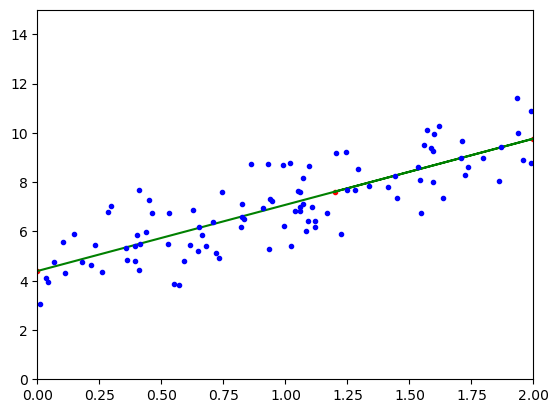

In [190]:
plt.plot(X_new, y_predict, "r.") 
plt.plot(X_new, y_predict, "g-") ## They are in the same line (Linear Regression)
plt.plot(X,y, "b.")
plt.axis([0,2,0,15])
plt.show()

#### Gradient Descent
- All the parameters in $\theta$ are initialised randomly
- Improve the estimates by iteractive incremental steps
- Steps are taken towards the descending slope
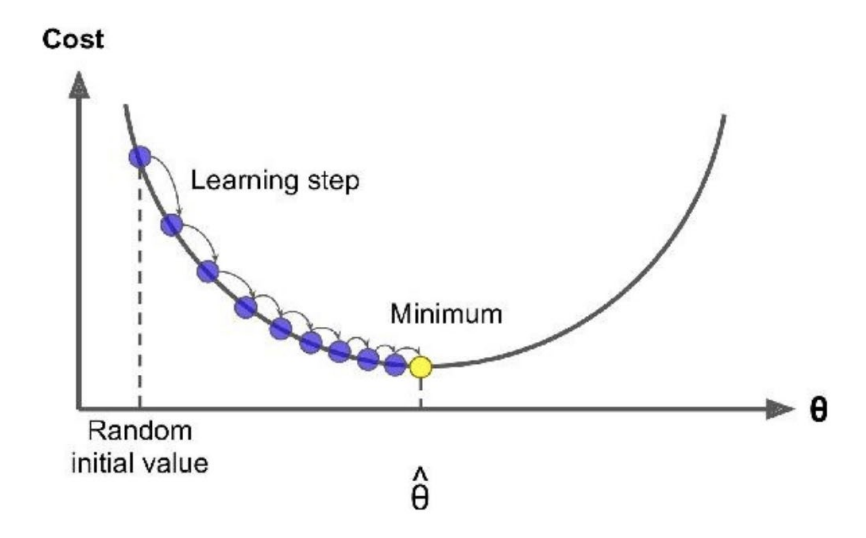

#### Learning Rate
- A critical parameter in gradient descend (GD)
- If it's too small, take more iterations to converge
- If it's too big, make it diverge, skiping the minimum
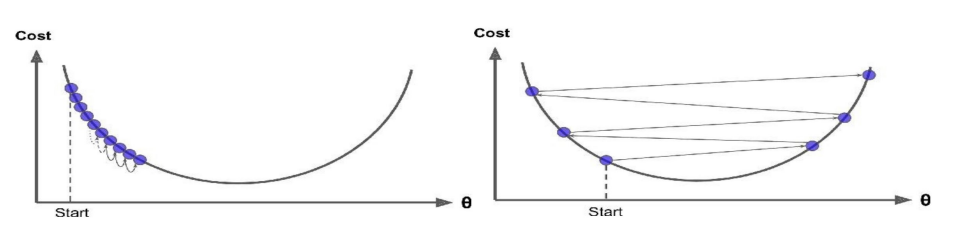
- But it's not always a perfect bowl shape
- These irregularities make convergence difficult
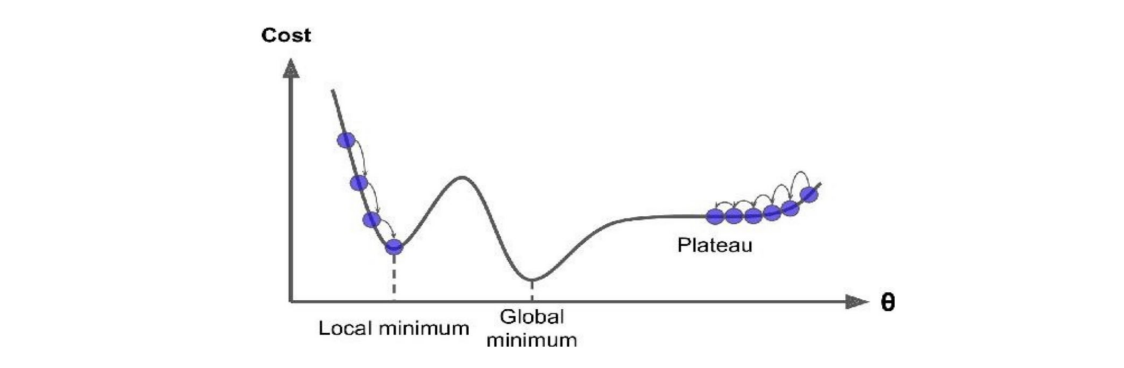
- Linear Regression of MSE is always a nice bowl shape
- Local minimum is also global minimum
- GD is guaranteed to approach towards the global minimum provided the learning rate is not too high

#### Batch Gradient Descent
- Computes the gradient of the loss function using the entire training dataset.
- $ \nabla_{\theta}MSE(\theta) = \frac{2}{m}X^T.(X . \theta - y)$
- After calculate every, consider moving in which way towards to the minimum
- As a result new $\theta$ need to be calculate using the learning rate $\eta$ (size of downhill step)
- $\theta^{next step} = \theta - \eta \nabla_{\theta}MSE(\theta)$
- Good because all is taken into consideration but it is not appropriate for the huge data set

In [814]:
eta = 0.1 #learning rate
n_iterations = 1000
m = 100
theta = np.random.randn(2,1) #Random initialisation

for iteration in range(n_iterations):
    gradients = 2/m * X_b.T.dot(X_b.dot(theta) - y)
    theta = theta - eta*gradients

print(theta)

[[4.39481512]
 [2.68551883]]


#### Stochastic Gradient Descent
- It is oppsite with the Batch GD
- Just choose a random instance in the training set
- Only gradient for the particular instance is used in the calculation
- Make the algorithm much faster on large data sets
- Drawbacks: when the cost function is irregular, the algorithm can escape the local minima

In [363]:
n_epochs = 50
t0, t1 = 5, 50 #learning schedule hyperparameters

def learning_schedule(t):
    return t0 / (t+t1)

theta = np.random.randn(2,1) # Random initialisation

for epoch in range(n_epochs):
    for i in range(m):
        random_index = np.random.randint(m)
        xi = X_b[random_index: random_index + 1]
        yi = y[random_index: random_index + 1]
        
        gradients = 2 * xi.T.dot(xi.dot(theta) - yi)  
        # Dont need to divided by m (Difference from batch DG)
        
        eta = learning_schedule(epoch*m + i) # Not sure
        theta = theta - eta*gradients # Similar

print(theta)

[[4.39484828]
 [2.65878592]]


In [375]:
from sklearn.linear_model import SGDRegressor
sgd_reg = SGDRegressor(max_iter = 50, penalty = None, eta0 = 0.1)
sgd_reg.fit(X, y.ravel()) #ravel() flatten the array

sgd_reg.intercept_, sgd_reg.coef_

(array([4.33543987]), array([2.67667307]))

#### Mini-batch Gradient Descent
- Between Batch and Stochastic GD
- At each step, the gradient vector can be computed from a random subset of the training set instead of the whole batch of a single instance
- (Usually small) random subset instances are called mini-batch

# Tutorial
1) Generate 300 linear looking random training points
2) For the Batch gradient descent implemenation, change the learning rate $\eta$ to 0.02,
and compare the results ($\theta_0$ and $\theta_1$). Then change $\eta$ to 0.2, and compare the results.
3) For the Stochastic Gradient Descent implementation, try three different learning
schedules (e.g. change t1)and compare the results.
4) For the skleran’s SGDRegressor, change the learning rate $\eta$ to three different values,
and compare the results.
5) Plot Batch and Stochastic descent regression predictions for the trainting points.

In [679]:
X_tutorial = 2 + np.random.rand(300,1) 
y_tutorial = 5 - 2*X_tutorial
X_calculate = np.c_[np.ones((300,1)), X_tutorial]

In [1107]:
## Batch DG
eta = 0.02 #learning rate
n_iterations = 51000 #If the learning rate is too small, we need to use huge number of iteration
m = 300
theta = np.random.randn(2,1) #Random initialisation

for iteration in range(n_iterations):
    gradients = 2/m * X_calculate.T.dot(X_calculate.dot(theta) - y_tutorial)
    theta = theta - eta*gradients

print(theta)

[[ 5.]
 [-2.]]


In [1105]:
eta = 0.2
n_iterations = 5 #The learning rate is kinda big so it bouncing around
m = 300
theta = np.random.randn(2,1) #Random initialisation

for iteration in range(n_iterations):
    gradients = 2/m * X_calculate.T.dot(X_calculate.dot(theta) - y_tutorial)
    theta = theta - eta*gradients

print(theta)

[[-2.54038381]
 [-7.63004352]]


In [1123]:
## Stochastic DG
n_epochs = 1000
t0, t1 = 2, 200 #learning schedule hyperparameters

def learning_schedule(t):
    return t0 / (t+t1)

theta = np.random.randn(2,1) # Random initialisation

for epoch in range(n_epochs):
    for i in range(m):
        random_index = np.random.randint(m)
        xi = X_calculate[random_index: random_index + 1]
        yi = y_tutorial[random_index: random_index + 1]
        
        gradients = 2 * xi.T.dot(xi.dot(theta) - yi)  
        # Dont need to divided by m (Difference from batch DG)
        
        eta = learning_schedule(epoch*m + i) # Not sure
        theta = theta - eta*gradients # Similar

print(theta)

[[ 1.91149813]
 [-0.77355959]]


In [1199]:
## skleran’s SGDRegressor
sgd_reg = SGDRegressor(max_iter = 50000000, penalty = None, eta0 = 0.1)
sgd_reg.fit(X_calculate, y_tutorial.ravel()) #ravel() flatten the array

sgd_reg.intercept_, sgd_reg.coef_[1]

(array([2.09913413]), -1.6801532527360217)